In [175]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC



In [176]:
features_df = pd.read_csv("https://raw.githubusercontent.com/pujan08/ML_Logistic_Regression_For_Credit_Card/main/Credit_card.csv")

Pre-Processing Part

In [177]:
# Converting categorical features into numerical value with both label encoder and one hot encoder
label_encoder = preprocessing.LabelEncoder()
onehotencoder = OneHotEncoder()

features_df['GENDER'] = label_encoder.fit_transform(features_df['GENDER'])
features_df['Car_Owner'] = label_encoder.fit_transform(features_df['Car_Owner'])
features_df['Propert_Owner'] = label_encoder.fit_transform(features_df['Propert_Owner'])

df = onehotencoder.fit_transform(features_df[['Type_Income']]).toarray()
df2 = pd.DataFrame(df)
df2_new = pd.concat([features_df,df2], axis=1)
df3=pd.get_dummies(features_df[["Type_Income"]])
features_df=pd.concat([features_df,df3],axis=1)
del features_df['Type_Income']

df = onehotencoder.fit_transform(features_df[['EDUCATION']]).toarray()
df2 = pd.DataFrame(df)
df2_new = pd.concat([features_df,df2], axis=1)
df3=pd.get_dummies(features_df[["EDUCATION"]])
features_df=pd.concat([features_df,df3],axis=1)
del features_df['EDUCATION']


features_df['Marital_status'] = label_encoder.fit_transform(features_df['Marital_status'])

df = onehotencoder.fit_transform(features_df[['Housing_type']]).toarray()
df2 = pd.DataFrame(df)
df2_new = pd.concat([features_df,df2], axis=1)
df3=pd.get_dummies(features_df[["Housing_type"]])
features_df=pd.concat([features_df,df3],axis=1)
del features_df['Housing_type']

df = onehotencoder.fit_transform(features_df[['Type_Occupation']]).toarray()
df2 = pd.DataFrame(df)
df2_new = pd.concat([features_df,df2], axis=1)
df3=pd.get_dummies(features_df[["Type_Occupation"]])
features_df=pd.concat([features_df,df3],axis=1)
del features_df['Type_Occupation']

print(features_df)

       Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0     5008827       1          1              1         0       180000.0   
1     5009744       0          1              0         0       315000.0   
2     5009746       0          1              0         0       315000.0   
3     5009749       0          1              0         0            NaN   
4     5009752       0          1              0         0       315000.0   
...       ...     ...        ...            ...       ...            ...   
1543  5028645       0          0              1         0            NaN   
1544  5023655       0          0              0         0       225000.0   
1545  5115992       1          1              1         2       180000.0   
1546  5118219       1          1              0         0       270000.0   
1547  5053790       0          1              1         0       225000.0   

      Marital_status  Birthday_count  Employed_days  Mobile_phone  ...  \
0            

In [178]:
#Find missing values and impute them
string_imputer = SimpleImputer(strategy='mean')
features_df_imputed = pd.DataFrame(string_imputer.fit_transform(features_df), columns=features_df.columns)
string_imputer.fit(features_df)
missing_values_after_imputation = features_df_imputed.isna().sum().sum()
print(features_df_imputed)

         Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0     5008827.0     1.0        1.0            1.0       0.0   180000.00000   
1     5009744.0     0.0        1.0            0.0       0.0   315000.00000   
2     5009746.0     0.0        1.0            0.0       0.0   315000.00000   
3     5009749.0     0.0        1.0            0.0       0.0   191399.32623   
4     5009752.0     0.0        1.0            0.0       0.0   315000.00000   
...         ...     ...        ...            ...       ...            ...   
1543  5028645.0     0.0        0.0            1.0       0.0   191399.32623   
1544  5023655.0     0.0        0.0            0.0       0.0   225000.00000   
1545  5115992.0     1.0        1.0            1.0       2.0   180000.00000   
1546  5118219.0     1.0        1.0            0.0       0.0   270000.00000   
1547  5053790.0     0.0        1.0            1.0       0.0   225000.00000   

      Marital_status  Birthday_count  Employed_days  Mobile_pho

In [179]:
#check and print if there are any missing values
if missing_values_after_imputation == 0:
    print("Sanity Check Passed: No missing values after imputation in features_df.")
else:
    print(f"Sanity Check Failed: There are still {missing_values_after_imputation} missing values in features_df after imputation.")

Sanity Check Passed: No missing values after imputation in features_df.


In [180]:
# Normalizing the data to remove bias
min_max = MinMaxScaler()
features_df_imputed_min_max = min_max.fit_transform(features_df_imputed[['Ind_ID', 'Annual_income', 'CHILDREN',
                                                               'Birthday_count', 'Employed_days','Family_Members']])

features_df_imputed[['Ind_ID', 'Annual_income', 'CHILDREN','Birthday_count', 'Employed_days','Family_Members']] = features_df_imputed_min_max

print(features_df_imputed_min_max)
print(features_df_imputed)

[[0.         0.09489051 0.         0.35809988 1.         0.07142857]
 [0.00647667 0.18248175 0.         0.66057653 0.03762134 0.07142857]
 [0.0064908  0.18248175 0.         0.51653952 0.03762134 0.07142857]
 ...
 [0.75689515 0.09489051 0.14285714 0.68279102 0.03264673 0.21428571]
 [0.77262422 0.15328467 0.         0.55994432 0.03746613 0.07142857]
 [0.31756895 0.12408759 0.         0.48402065 0.03164181 0.07142857]]
        Ind_ID  GENDER  Car_Owner  Propert_Owner  CHILDREN  Annual_income  \
0     0.000000     1.0        1.0            1.0  0.000000       0.094891   
1     0.006477     0.0        1.0            0.0  0.000000       0.182482   
2     0.006491     0.0        1.0            0.0  0.000000       0.182482   
3     0.006512     0.0        1.0            0.0  0.000000       0.102287   
4     0.006533     0.0        1.0            0.0  0.000000       0.182482   
...        ...     ...        ...            ...       ...            ...   
1543  0.139972     0.0        0.0        

In [181]:
target_df = pd.read_csv("https://raw.githubusercontent.com/pujan08/ML_Logistic_Regression_For_Credit_Card/main/Credit_card_label.csv")

In [182]:
#Find missing values and impute them
numeric_imputer = SimpleImputer(strategy='mean')
target_df_imputed = pd.DataFrame(numeric_imputer.fit_transform(target_df), columns=target_df.columns)
numeric_imputer.fit(target_df)
print(target_df_imputed)

         Ind_ID  label
0     5008827.0    1.0
1     5009744.0    1.0
2     5009746.0    1.0
3     5009749.0    1.0
4     5009752.0    1.0
...         ...    ...
1543  5028645.0    0.0
1544  5023655.0    0.0
1545  5115992.0    0.0
1546  5118219.0    0.0
1547  5053790.0    0.0

[1548 rows x 2 columns]


In [183]:
#check and print if there are any missing values
missing_values_after_imputation = target_df_imputed.isna().sum().sum()
if missing_values_after_imputation == 0:
    print("Sanity Check Passed: No missing values after imputation in target_df.")
else:
    print(f"Sanity Check Failed: There are still {missing_values_after_imputation} missing values in target_df after imputation.")


Sanity Check Passed: No missing values after imputation in target_df.


2. Training and Testing Part

In [184]:
# Defining features and labels
X = features_df_imputed
y = target_df_imputed['label']

In [185]:
# Defining train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69420)

In [186]:
from sklearn import tree
# Dicision Tree model
dt = tree.DecisionTreeClassifier()
# Train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [187]:
# Run Test set on the model and print the confusion matrix
dt_pred = dt.predict(X_test)
print(confusion_matrix(y_test, dt_pred))
print('accuracy: ', accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

[[249  30]
 [ 18  13]]
accuracy:  0.8451612903225807
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       279
         1.0       0.30      0.42      0.35        31

    accuracy                           0.85       310
   macro avg       0.62      0.66      0.63       310
weighted avg       0.87      0.85      0.86       310



[Text(0.5876570159313725, 0.9736842105263158, 'x[8] <= 0.035\ngini = 0.206\nsamples = 1238\nvalue = [1094, 144]'),
 Text(0.46232383578431374, 0.9210526315789473, 'x[15] <= 0.5\ngini = 0.133\nsamples = 668\nvalue = [620, 48]'),
 Text(0.4344515931372549, 0.868421052631579, 'x[27] <= 0.5\ngini = 0.126\nsamples = 664\nvalue = [619, 45]'),
 Text(0.4022365196078431, 0.8157894736842105, 'x[4] <= 0.25\ngini = 0.118\nsamples = 653\nvalue = [612, 41]'),
 Text(0.3943933823529412, 0.7631578947368421, 'x[1] <= 1.5\ngini = 0.115\nsamples = 652\nvalue = [612, 40]'),
 Text(0.35349264705882355, 0.7105263157894737, 'x[11] <= 0.5\ngini = 0.11\nsamples = 648\nvalue = [610, 38]'),
 Text(0.2952205882352941, 0.6578947368421053, 'x[25] <= 0.5\ngini = 0.141\nsamples = 457\nvalue = [422, 35]'),
 Text(0.2531862745098039, 0.6052631578947368, 'x[5] <= 0.127\ngini = 0.13\nsamples = 444\nvalue = [413, 31]'),
 Text(0.24534313725490195, 0.5526315789473685, 'x[33] <= 0.5\ngini = 0.168\nsamples = 335\nvalue = [304, 31]'

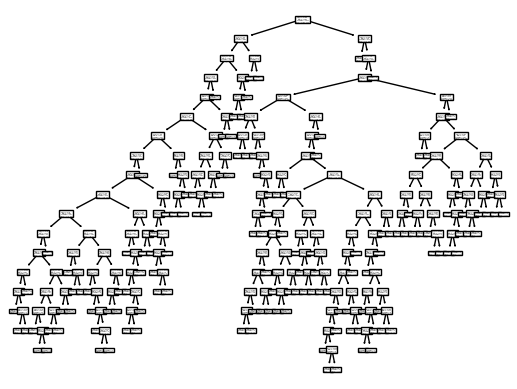

In [188]:
tree.plot_tree(dt)

In [189]:
# Use GridSearchCV to tune the hyperparameters
dt_model_gscv = tree.DecisionTreeClassifier()
# param_grid = {
#         'criterion': ['gini', 'entropy'],
#         'max_depth':range(1,10),
#         'min_samples_split':range(1,10),
#         'min_samples_leaf':range(1,5)
# }
param_grid = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search = GridSearchCV(dt_model_gscv, param_grid,  cv=5)
grid_search.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [190]:
# Build a model with the best params and run test set on it
print("Best Parameters:", grid_search.best_params_)
best_grid = grid_search.best_estimator_
svm_model_gscv_pred = best_grid.predict(X_test)
print(confusion_matrix(y_test, svm_model_gscv_pred))
print('accuracy: ', accuracy_score(y_test, svm_model_gscv_pred))
print(classification_report(y_test, svm_model_gscv_pred))

Best Parameters: {'max_leaf_nodes': 2, 'min_samples_split': 2}
[[279   0]
 [ 31   0]]
accuracy:  0.9
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       279
         1.0       0.00      0.00      0.00        31

    accuracy                           0.90       310
   macro avg       0.45      0.50      0.47       310
weighted avg       0.81      0.90      0.85       310



/Users/edward/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edward/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edward/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [191]:
# Removing features
features_df_removed = features_df_imputed.drop(['Ind_ID', 'GENDER', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID'], axis=1)
print(features_df_removed)
X_dropped = features_df_removed
X_train, X_test, y_train, y_test = train_test_split(X_dropped, y, test_size=0.2, random_state=69420)

      Car_Owner  Propert_Owner  CHILDREN  Annual_income  Marital_status  \
0           1.0            1.0  0.000000       0.094891             1.0   
1           1.0            0.0  0.000000       0.182482             1.0   
2           1.0            0.0  0.000000       0.182482             1.0   
3           1.0            0.0  0.000000       0.102287             1.0   
4           1.0            0.0  0.000000       0.182482             1.0   
...         ...            ...       ...            ...             ...   
1543        0.0            1.0  0.000000       0.102287             1.0   
1544        0.0            0.0  0.000000       0.124088             3.0   
1545        1.0            1.0  0.142857       0.094891             1.0   
1546        1.0            0.0  0.000000       0.153285             0.0   
1547        1.0            1.0  0.000000       0.124088             1.0   

      Birthday_count  Employed_days  Family_Members  \
0           0.358100       1.000000        0

In [192]:
# Run GridSearchCV again, run test set on the best model, and print the accuracy
grid_search.fit(X_train, y_train) 
print("Best Parameters:", grid_search.best_params_)
best_grid = grid_search.best_estimator_
svm_model_gscv_pred = best_grid.predict(X_test)
print(confusion_matrix(y_test, svm_model_gscv_pred))
print('accuracy: ', accuracy_score(y_test, svm_model_gscv_pred))
print(classification_report(y_test, svm_model_gscv_pred))

Best Parameters: {'max_leaf_nodes': 2, 'min_samples_split': 2}
[[279   0]
 [ 31   0]]
accuracy:  0.9
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       279
         1.0       0.00      0.00      0.00        31

    accuracy                           0.90       310
   macro avg       0.45      0.50      0.47       310
weighted avg       0.81      0.90      0.85       310



/Users/edward/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edward/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/edward/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
